In [ ]:
pip install pandas matplotlib scikit-learn numpy


In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r'D:\Personal_Document\GitHub\CNN-Bi-LSTM-Research\training-data\SWT-CNN-Bi-LSTM-Model-1\report.csv'
df = pd.read_csv(file_path)

# Select the parameters and Profit Factor
selected_columns = [
    "ATR Factor_ioinput_65_-1_number",
    "ATR Period_ioinput_63_-1_number",
    "Level_ioinput_74_1_number",
    "Lookback period_ioinput_80_-1_number",
    "Period_ioinput_74_2_number",
    "Profit Factor_all"
]
selected_df = df[selected_columns]

# Extract the Profit Factor for clustering
X = selected_df[["Profit Factor_all"]]

# Scale the Profit Factor to have mean=0 and variance=1 for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=5, random_state=0, tol=0.01)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the Elbow method and fit the k-means model
num_clusters = 4  # Replace with the number of clusters you choose based on the Elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=5, random_state=0, tol=0.01)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
selected_df['Cluster'] = clusters

# Print the parameter combinations in the cluster with the highest average Profit Factor
best_cluster = selected_df.groupby('Cluster')['Profit Factor_all'].mean().idxmax()
best_parameters = selected_df[selected_df['Cluster'] == best_cluster]

print("Parameter combinations in the cluster with the highest average Profit Factor:")
print(best_parameters.drop(columns=['Profit Factor_all', 'Cluster']))
# Save the best parameter combinations to a .txt file
best_parameters.drop(columns=['Profit Factor_all', 'Cluster']).to_csv('best_parameters.txt', sep='\t', index=False)

print("Best parameter combinations saved to 'best_parameters.txt'")

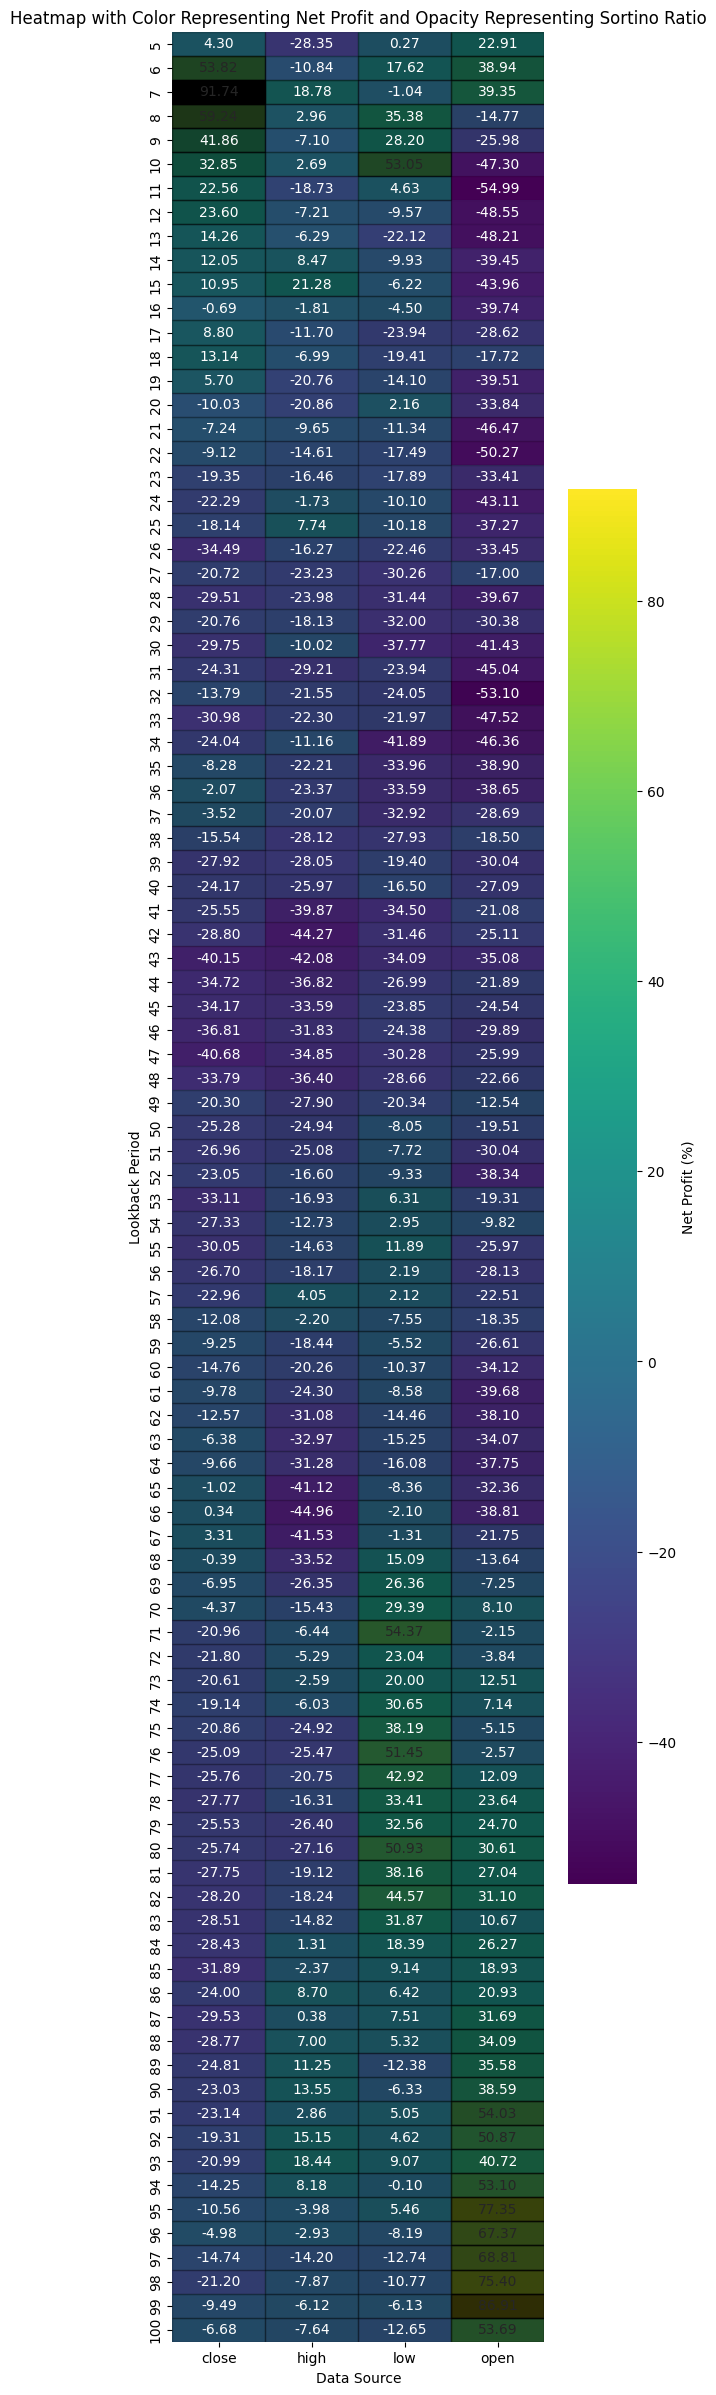

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r'D:\Personal_Document\GitHub\CNN-Bi-LSTM-Research\training-data\SWT-CNN-Bi-LSTM-Model-1\123414.csv'
df = pd.read_csv(file_path)


# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = pd.pivot_table(df, values='Net Profit_all_percent', 
                              index=['Lookback period_ioinput_80_-1_number'], 
                              columns='Data source_ioinput_82_-1_popup')

# Normalize the Sortino Ratio to be between 0 and 1 for opacity
df['Normalized Sortino'] = (df['Sortino Ratio_all'] - df['Sortino Ratio_all'].min()) / \
                           (df['Sortino Ratio_all'].max() - df['Sortino Ratio_all'].min())

# Create a pivot table for Sortino Ratio
sortino_data = pd.pivot_table(df, values='Normalized Sortino', 
                              index=['Lookback period_ioinput_80_-1_number'], 
                              columns='Data source_ioinput_82_-1_popup')

# Create a heatmap
plt.figure(figsize=(6, 30))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Net Profit (%)'})

# Adjust the opacity of each cell according to the Sortino Ratio
for y in range(sortino_data.shape[0]):
    for x in range(sortino_data.shape[1]):
        val = sortino_data.iloc[y, x]
        if not np.isnan(val):  # Ignore NaN values
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=(0, 0, 0, val)))

plt.xlabel('Data Source')
plt.ylabel('Lookback Period')
plt.title('Heatmap with Color Representing Net Profit and Opacity Representing Sortino Ratio')
plt.show()
